In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
import plotly.offline as pyo 
import plotly.io as pio

In [3]:
df= pd.read_csv("Dataset - complex_account_billing_data.csv")

In [4]:
df.head()

Account ID  Customer Name Billing Date      Amount   Status   Description  \
0        1001   David Wilson   2023-01-01  193.987558  Pending  Consultation   
1        1002  Alice Johnson   2023-01-02  370.656021  Pending      Purchase   
2        1003  Sophia Garcia   2023-01-03  233.019486  Pending      Lab Test   
3        1004   Olivia Davis   2023-01-04  296.120725     Paid     Follow-up   
4        1005   David Wilson   2023-01-05  294.654764     Paid       Therapy   

    Department  
0   Pediatrics  
1  Orthopedics  
2     Pharmacy  
3     Pharmacy  
4          ENT

In [5]:
df.tail()

Account ID    Customer Name Billing Date       Amount   Status  \
105        1026        Chris Lee   2023-01-26   182.072114   Unpaid   
106        1027     Olivia Davis   2023-01-27    87.943419     Paid   
107        1028  Mason Rodriguez   2023-01-28  1511.137290  Pending   
108        1029         John Doe   2023-01-29    72.217921     Paid   
109        1030       Emma Brown   2023-01-30   375.220875  Pending   

     Description   Department  
105    Follow-up  Orthopedics  
106    Follow-up    Radiology  
107   Medication     Oncology  
108  Service Fee      Unknown  
109    Emergency   Cardiology

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Account ID     110 non-null    int64  
 1   Customer Name  110 non-null    object 
 2   Billing Date   110 non-null    object 
 3   Amount         110 non-null    float64
 4   Status         110 non-null    object 
 5   Description    110 non-null    object 
 6   Department     110 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.1+ KB


In [7]:
df.describe()

Account ID       Amount
count   110.000000   110.000000
mean   1048.000000   479.309018
std      28.809721   738.759966
min    1001.000000    50.581003
25%    1023.250000   145.411712
50%    1045.500000   253.709053
75%    1072.750000   392.219435
max    1100.000000  3849.771331

In [8]:
df.describe(include= "object").T

count unique         top freq
Customer Name   110     10  Emma Brown   16
Billing Date    110    100  2023-01-28    2
Status          110      4        Paid   38
Description     110     11   Follow-up   15
Department      110     11  Cardiology   15

In [9]:
# Identify Missing Values
print(df.isnull().sum())


Account ID       0
Customer Name    0
Billing Date     0
Amount           0
Status           0
Description      0
Department       0
dtype: int64


In [10]:
# Check for duplicate rows (based on all columns)
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [11]:
# Validate data types (assuming expected types):
expected_types = {
    "Account ID": str,
    "Customer Name": str,
    "Billing Date": pd.to_datetime,  # Converts to datetime format
    "Amount": float,
    "Status": str,
    "Description": str,
    "Department": str
}

In [12]:
# Check if data types match expectations (using `infer_objects=True` in read_csv might help)
for col, expected_type in expected_types.items():
  if df[col].dtype != expected_type:
    print(f"WARNING: Column '{col}' has unexpected data type. Expected: {expected_type}, Actual: {df[col].dtype}")

In [13]:
# Specific data format validation (example: check for valid date format)
if pd.api.types.is_datetime64_dtype(df['Billing Date']):  # Check if Billing Date is datetime
  # Additional validation for date format (replace with your desired format)
  try:
    df['Billing Date'] = pd.to_datetime(df['Billing Date'], format='%Y-%m-%d')  # Assuming YYYY-MM-DD format
  except ValueError:
    print("WARNING: Some 'Billing Date' entries might have invalid format. Consider additional validation or cleaning.")


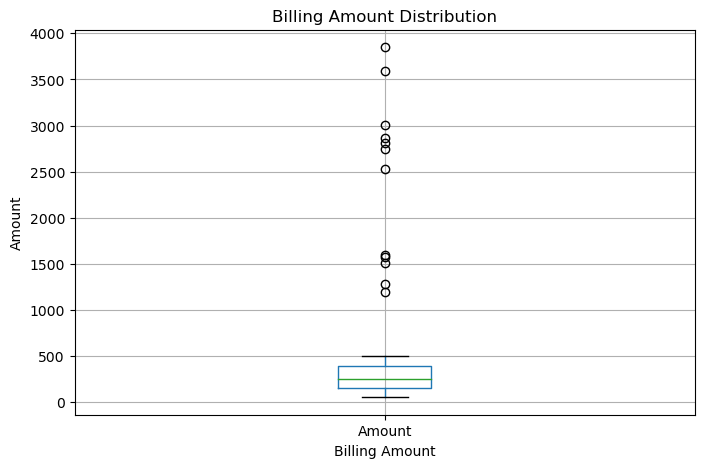

In [14]:
# Analyze Billing Amount Outliers with Boxplots
plt.figure(figsize=(8, 5))
df.boxplot(column='Amount')
plt.xlabel('Billing Amount')
plt.ylabel('Amount')
plt.title('Billing Amount Distribution')
plt.show()

In [15]:
df.shape

(110, 7)

In [16]:
# Numerical features

df.describe(exclude=['O'])

Account ID       Amount
count   110.000000   110.000000
mean   1048.000000   479.309018
std      28.809721   738.759966
min    1001.000000    50.581003
25%    1023.250000   145.411712
50%    1045.500000   253.709053
75%    1072.750000   392.219435
max    1100.000000  3849.771331

In [17]:
# Assuming 'Billing Date' has valid date strings
try:
  df['Billing Date'] = pd.to_datetime(df['Billing Date'])
except ValueError:
  print("Error converting 'Billing Date' to datetime. Check data format!")

# Calculate Billing Cycle Time
df['Billing Cycle Time'] = (df['Billing Date'].dt.to_period('D') - df['Billing Date'].shift(1).dt.to_period('D')) / np.timedelta64(1, 'D')
df['Billing Cycle Time'] = df['Billing Cycle Time'].fillna(df['Billing Cycle Time'].mean())  # Impute missing values

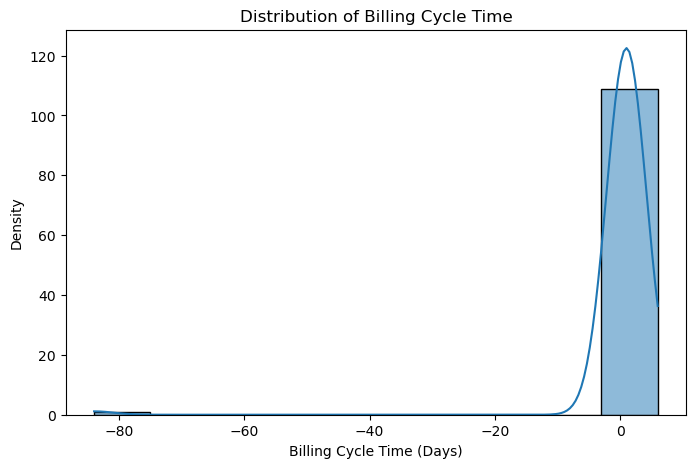

In [18]:
# Analyze Billing Cycle Time Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Billing Cycle Time", bins=10, kde=True)
plt.xlabel('Billing Cycle Time (Days)')
plt.ylabel('Density')
plt.title('Distribution of Billing Cycle Time')
plt.show()


In [19]:
# Analyze Payment Discrepancies (assuming 'Amount' and 'Status' exist)
payment_discrepancies = df[df['Status'] == 'Discrepancy']

if not payment_discrepancies.empty:
  print("Billing Discrepancies Found:")
  print(payment_discrepancies[['Account ID', 'Customer Name', 'Amount', 'Description']].head())  # Show a few examples
else:
  print("No billing discrepancies found.")

No billing discrepancies found.


In [20]:
# Analyze Late Payment Occurrences (assuming 'Status' contains 'Late')
late_payments = df[df['Status'] == 'Late']
late_payment_rate = (len(late_payments) / len(df)) * 100

print(f"Late Payment Rate: {late_payment_rate:.2f}%")

# Analyze Average Payment Amount (assuming 'Amount' exists)
average_payment = df['Amount'].mean()
print(f"Average Payment Amount: ${average_payment:.2f}")

Late Payment Rate: 0.00%
Average Payment Amount: $479.31


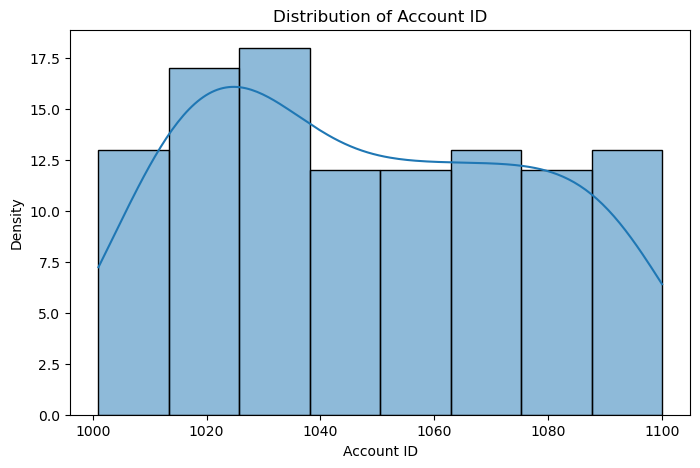

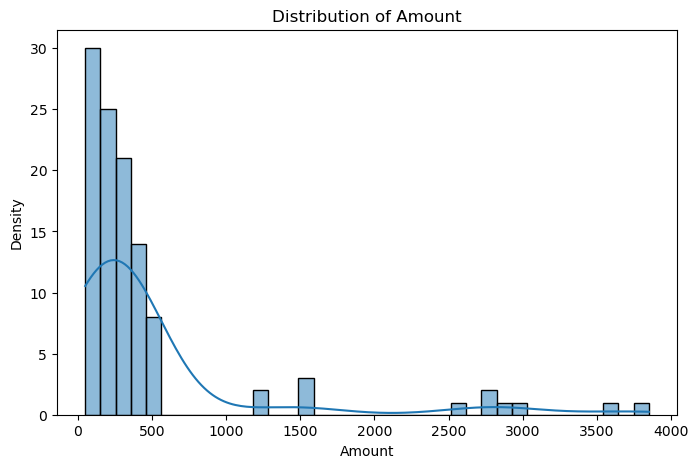

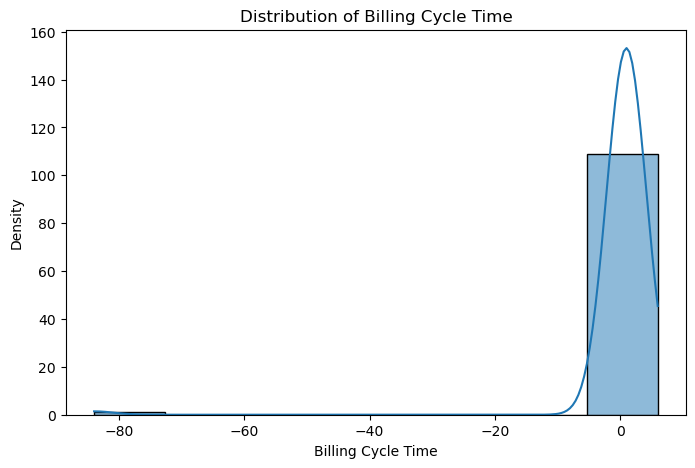

In [21]:
# 1. Distribution Plots (numeric columns)
numeric_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
for col in numeric_cols:
  plt.figure(figsize=(8, 5))
  sns.histplot(data=df, x=col, kde=True)
  plt.xlabel(col)
  plt.ylabel('Density')
  plt.title(f'Distribution of {col}')
  plt.show()


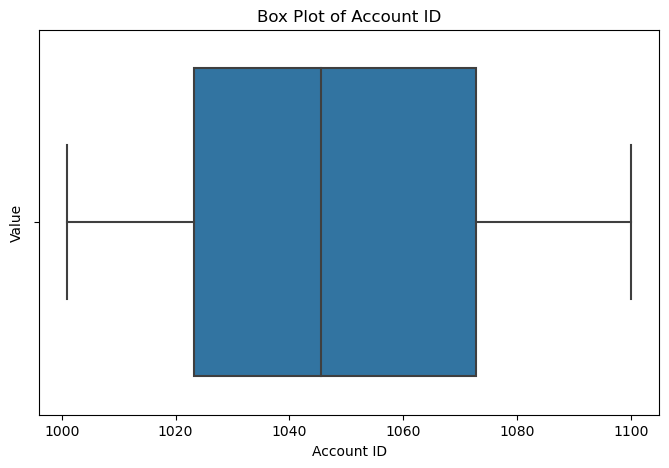

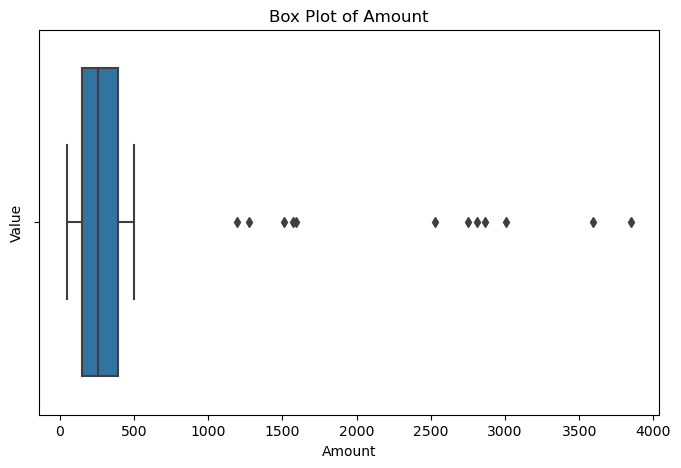

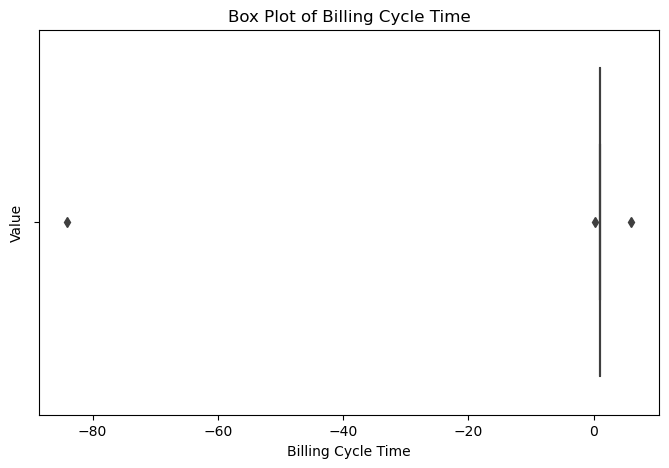

In [22]:
# 2. Box Plots (numeric columns)
for col in numeric_cols:
  plt.figure(figsize=(8, 5))
  sns.boxplot(data=df, x=col)
  plt.xlabel(col)
  plt.ylabel('Value')
  plt.title(f'Box Plot of {col}')
  plt.show()

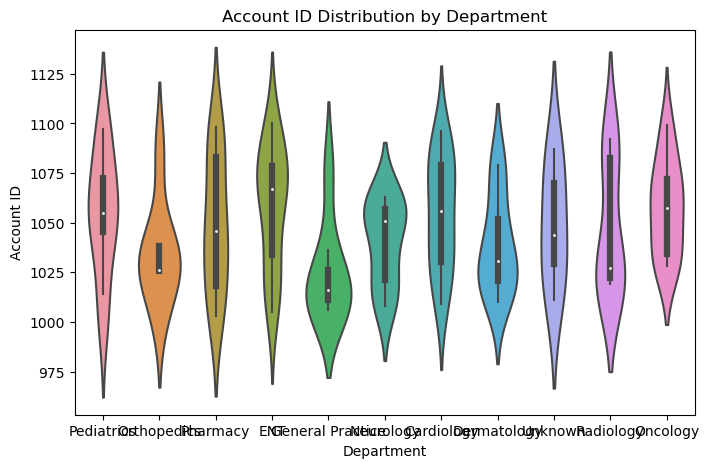

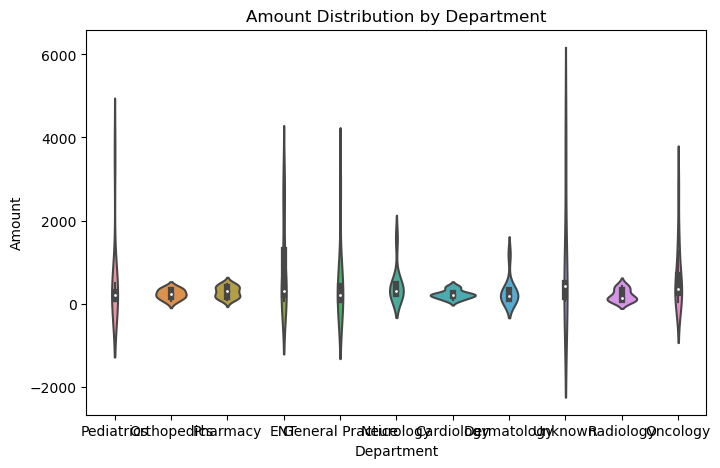

In [23]:
# 3. Categorical vs. Numeric Relationships (assuming 'Department' is categorical)
for col in numeric_cols:
  if col != 'Billing Cycle Time':  # Avoid redundant plot for Billing Cycle Time
    plt.figure(figsize=(8, 5))
    sns.violinplot(x="Department", y=col, showmeans=True, data=df)
    plt.xlabel('Department')
    plt.ylabel(col)
    plt.title(f'{col} Distribution by Department')
    plt.show()

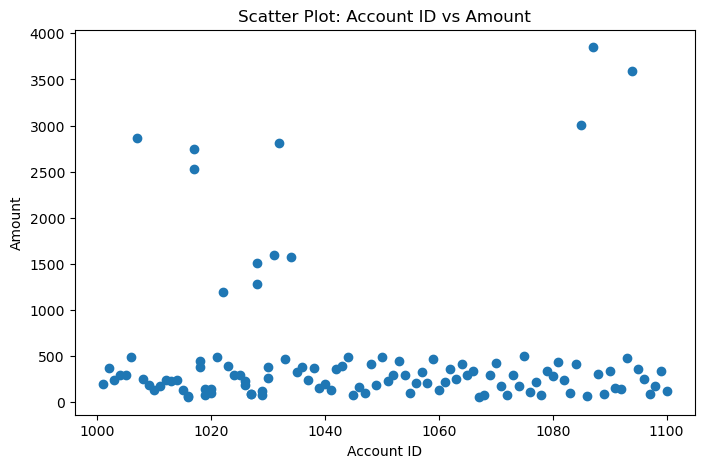

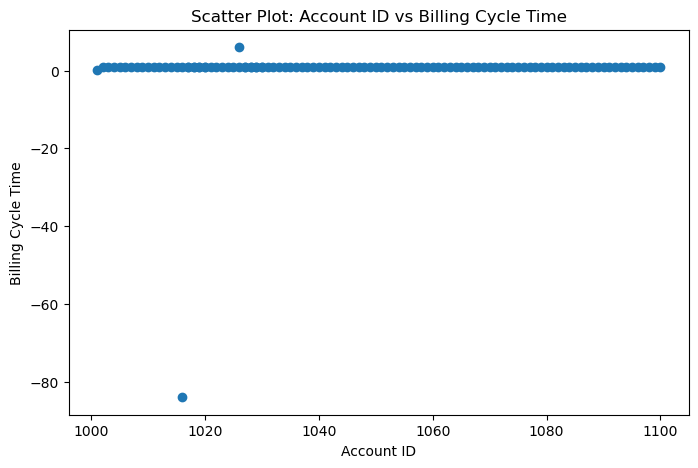

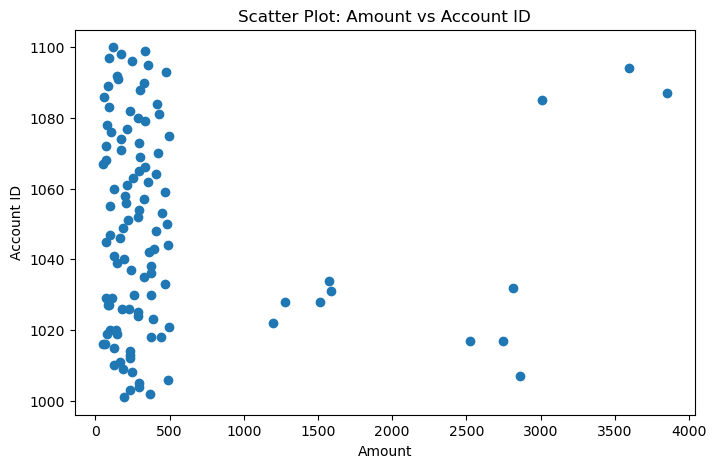

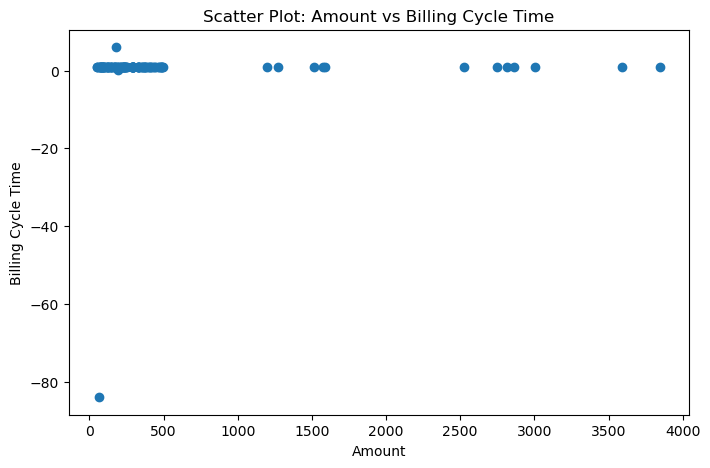

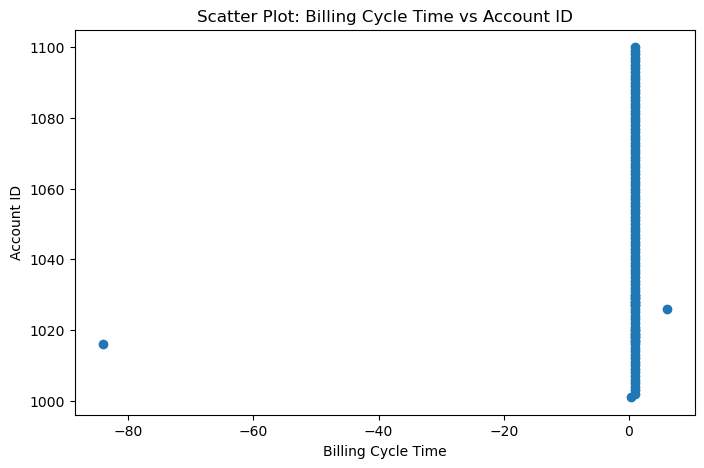

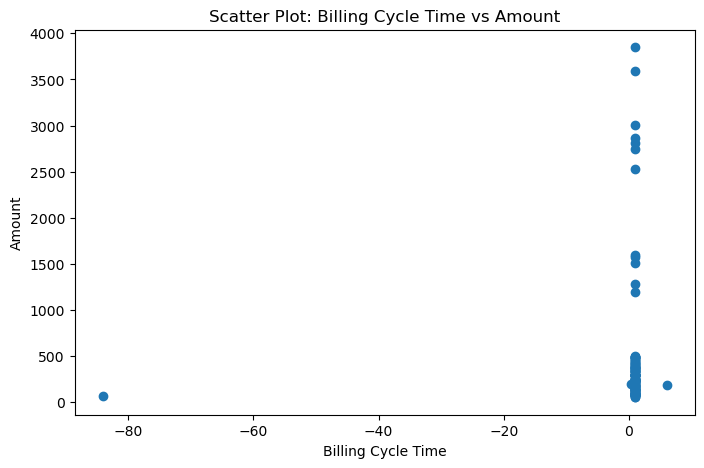

In [24]:
# 4. Scatter Plots (explore relationships between numeric columns)
for col1 in numeric_cols:
  for col2 in numeric_cols:
    if col1 != col2:  # Avoid redundant plots
      plt.figure(figsize=(8, 5))
      plt.scatter(x=df[col1], y=df[col2])
      plt.xlabel(col1)
      plt.ylabel(col2)
      plt.title(f'Scatter Plot: {col1} vs {col2}')
      plt.show()


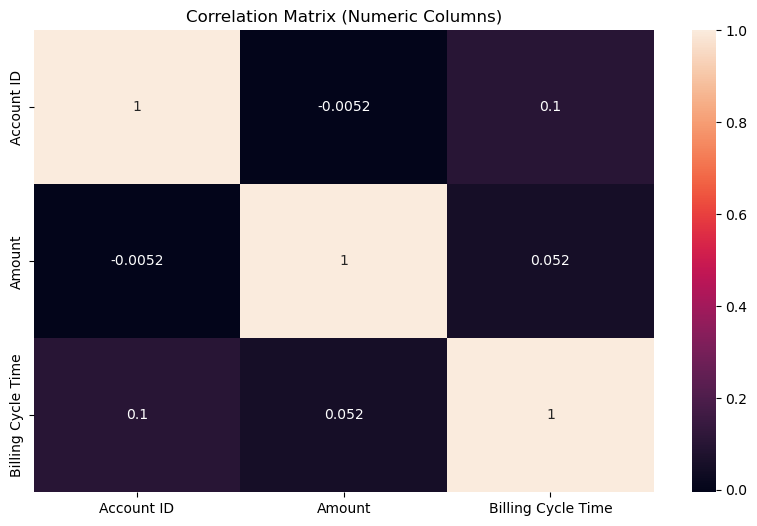

In [25]:
# 5. Heatmap (correlations between numeric columns)
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix (Numeric Columns)')
plt.show()


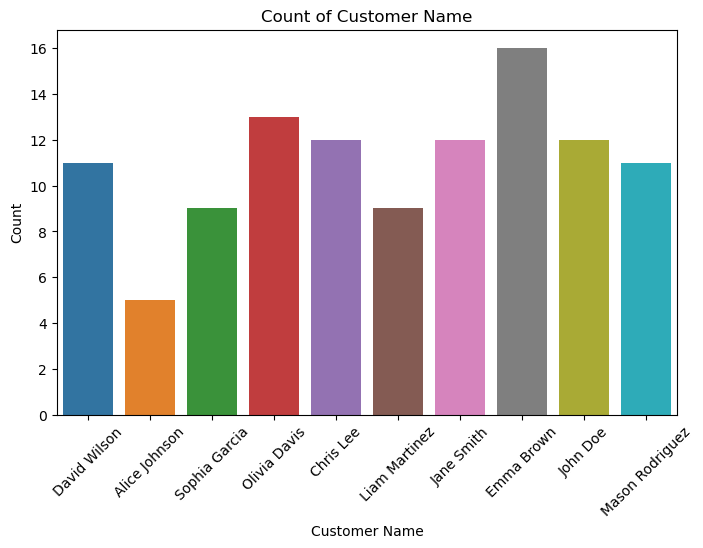

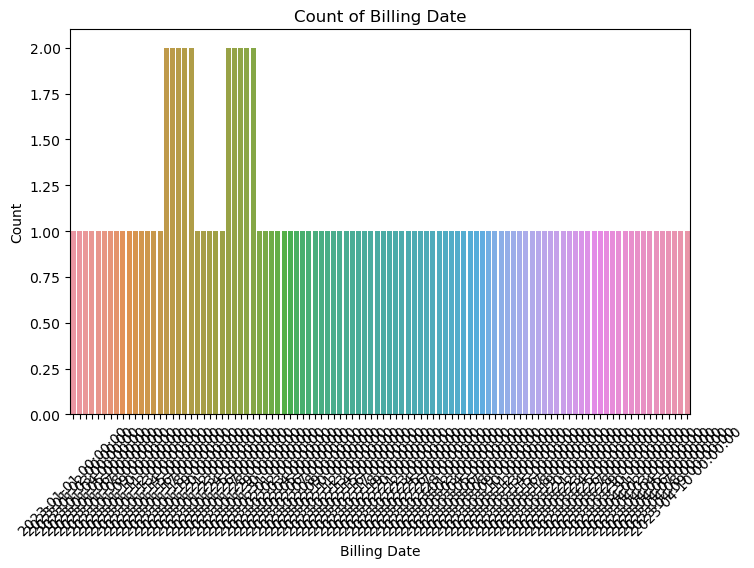

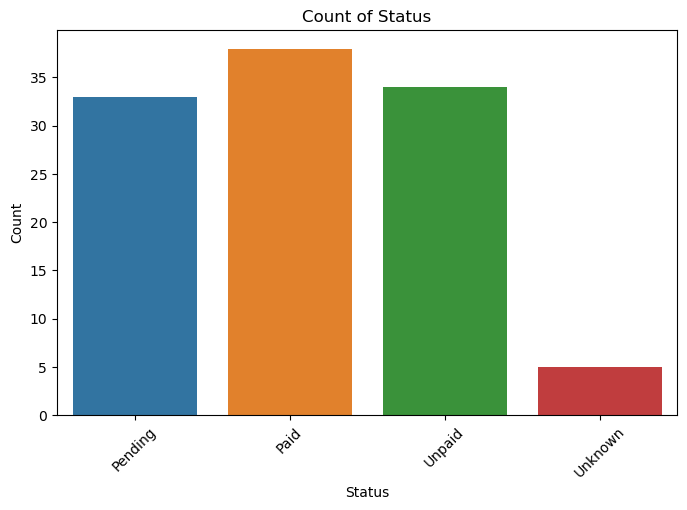

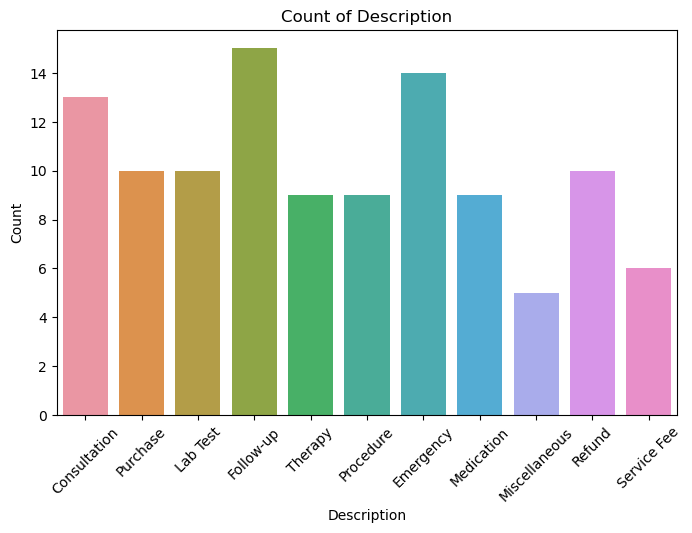

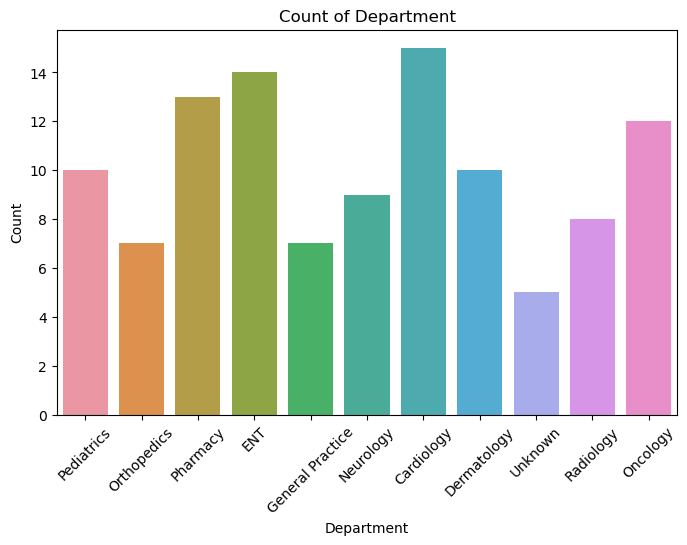

In [26]:
# 6. Bar Charts (categorical columns)
categorical_cols = [col for col in df.columns if not pd.api.types.is_numeric_dtype(df[col])]
for col in categorical_cols:
  plt.figure(figsize=(8, 5))
  sns.countplot(x=col, data=df)
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.title(f'Count of {col}')
  plt.xticks(rotation=45)  # Rotate x-axis labels for readability if many categories
  plt.show()

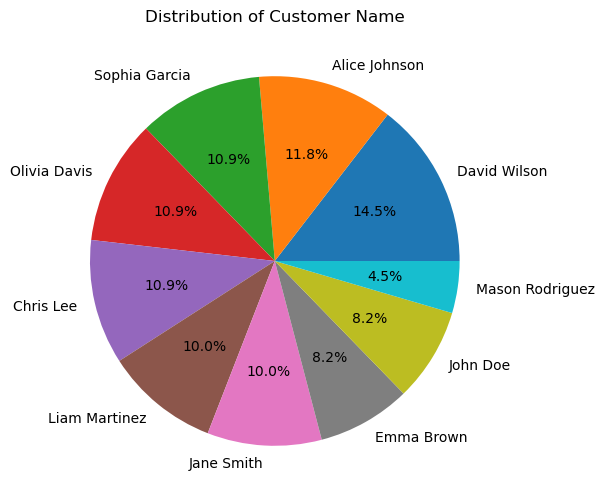

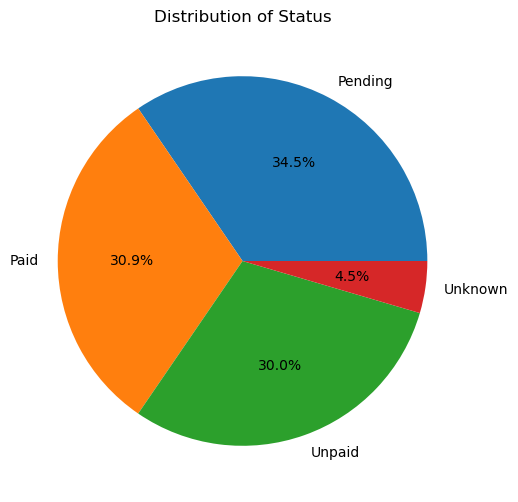

In [27]:
# 7. Pie Charts (categorical columns with limited categories, for visual appeal)
for col in categorical_cols:
  if len(df[col].unique()) <= 10:  # Consider pie charts for up to 10 categories
    plt.figure(figsize=(6, 6))
    plt.pie(df[col].value_counts(), labels=df[col].unique(), autopct="%1.1f%%")
    plt.title(f'Distribution of {col}')
    plt.show()

In [28]:
# 8. Interactive Line Charts (using Plotly for time-based data or trends)
if 'Billing Date' in df.columns and pd.api.types.is_datetime64_dtype(df['Billing Date']):
  fig = px.line(df, x='Billing Date', y='Amount', title='Billing Amount Over Time')
  fig.show()